### Rohin Bhat
### Class: TE-4 (K-4)
### Roll No: 31406

# DSBDAL Assignment - 5
# Data Analytics, II

In [357]:
# Importing required libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [358]:
import warnings
warnings.filterwarnings("ignore")

**Dataset:** https://github.com/shivang98/Social-Network-ads-Boost/blob/master/Social_Network_Ads.csv
- User ID: Unique ID of the user
- Gender: Gender of the user
- Age: Age of the user
- EstimatedSalary: Approximate salary of the user
- Purchased: Whether the user purchased the product advertised (0 = No, 1 = Yes)

In [359]:
# Importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Data Preprocessing

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [361]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [362]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [363]:
df.shape

(400, 5)

## Visualizations

<AxesSubplot:xlabel='Age', ylabel='Density'>

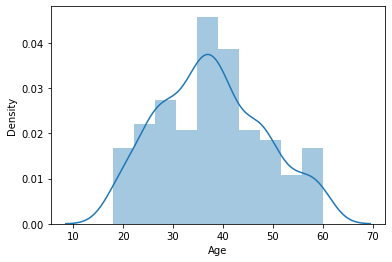

In [364]:
sb.distplot(df["Age"])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

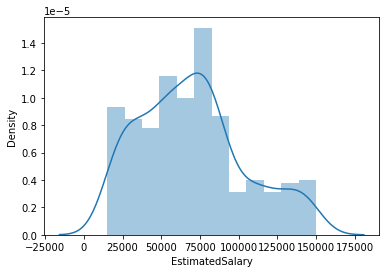

In [365]:
sb.distplot(df["EstimatedSalary"])

## Finding Outliers

<AxesSubplot:xlabel='Age'>

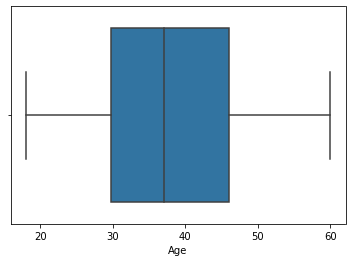

In [366]:
sb.boxplot(x = df["Age"])

<AxesSubplot:xlabel='EstimatedSalary'>

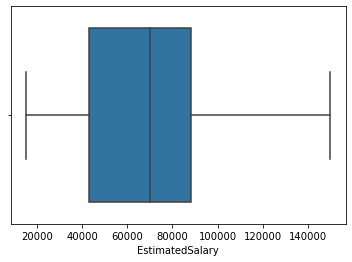

In [367]:
sb.boxplot(x = df["EstimatedSalary"])

No outliers are found so we continue

## Splitting the dataset into independent and dependent data

In [368]:
X = df[["Age", "EstimatedSalary"]]
Y = df["Purchased"]

print("X: \n", X)
print("\nY: \n", Y)

X: 
      Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]

Y: 
 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [369]:
# Splitting the dataset into training and testing sets (75% training, 25% testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


## Scaling the data

## $z = \frac{x - u}{s}$

In [370]:
# Normalizing the data using a standard scaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Training the model

In [371]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs')
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

## Testing and evaluating the model

In [372]:
pred = classifier.predict(X_test)

<AxesSubplot:>

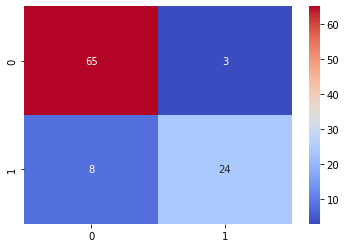

In [373]:
# Generating the confusion matrix

cm = confusion_matrix(Y_test,pred)
sb.heatmap(data=cm, annot=True, cmap="coolwarm")

In [374]:
tp = cm[0][0]
fp = cm[1][0]
tn = cm[1][1]
fn = cm[0][1]

print("TP:", tp)
print("FP:", fp)
print("TN:", tn)
print("FN:", fn)

TP: 65
FP: 8
TN: 24
FN: 3


## $Precision = \frac{TP}{TP + FP}$

## $Recall = \frac{TP}{TP + FN}$

## $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

## $F1-Score = \frac{2(Recall \times Precision)}{Recall + Precision}$

In [375]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = (2 * recall * precision) / (recall + precision)

print("Precision = %0.3f" %precision)
print("Recall = %0.3f" %recall)
print("Accuracy = %0.3f" %accuracy)
print("F1-Score = %0.3f" %f1_score)

Precision = 0.890
Recall = 0.956
Accuracy = 0.890
F1-Score = 0.922


In [376]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



Text(0, 0.5, 'Estimated Salary')

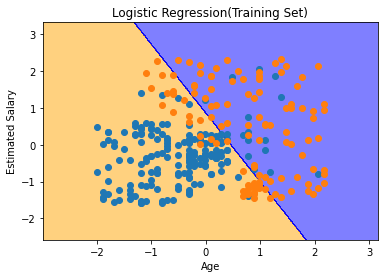

In [377]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], cmap = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

Text(0, 0.5, 'Estimated Salary')

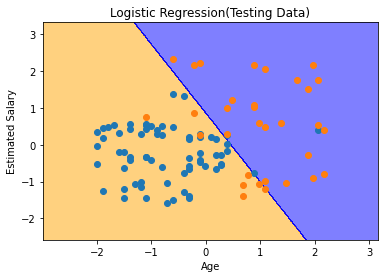

In [378]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], cmap = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Logistic Regression(Testing Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')